## Poznajemy możliwości MLPClassifier z sklearn.neural_network
Zapoznaj się z **całością**:
1. źródeł funkcji aktywacji: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/neural_network/_base.py
2. dokumentacji API &ndash; metody i parametry: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
3. opisu działania: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

## Tworzymy malutki zbiór danych i prostą sieć

layer weight matrix shapes: [(2, 2), (2, 1)]
detected layer sizes: [2, 2, 1]


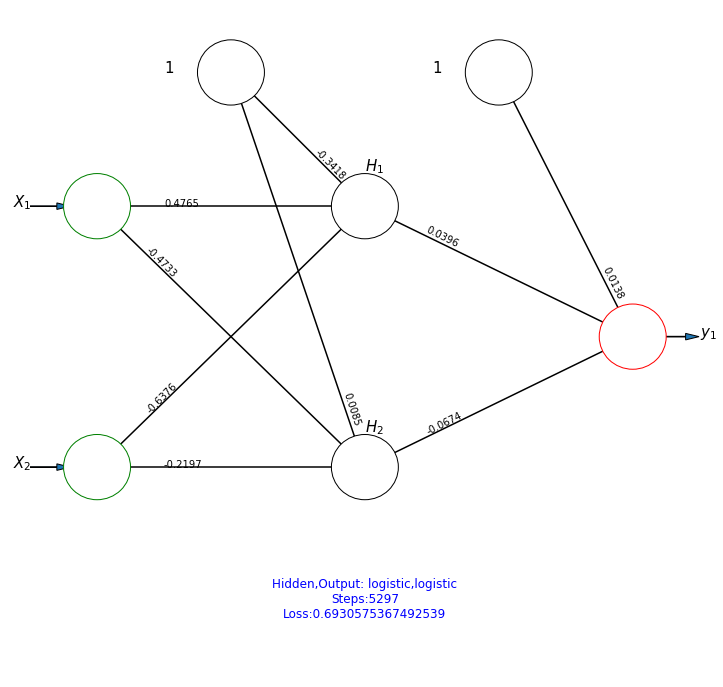

In [4]:
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
activation = 'logistic'
solver = 'sgd'
problem = "XOR"
show_hist = True
problem_lower = problem.lower()
hidden_layer_sizes = [2]
net_schema_name = "-".join(map(str, hidden_layer_sizes)) + "-1"
name = f"{problem_lower}/{activation}/{solver}/{net_schema_name}/net" 
X = [[0,0],[0,1],[1,0],[1,1]] #pięć dwu-atrybutowych przykładów
y = [0, 1, 1, 0] #...i ich liczbowe "klasy decyzyjne"
clf = MLPClassifier(solver=solver, alpha=10e-5, hidden_layer_sizes=hidden_layer_sizes, random_state=15, 
                    max_iter=100000, n_iter_no_change=5000, activation=activation)

clf.fit(X, y) #tu zachodzi uczenie
draw_nn(clf, name) #obejrzyj źródła tej funkcji, możesz ją ulepszyć!

## Rysujemy rzut z góry na wyjście próbkując wartości wejść

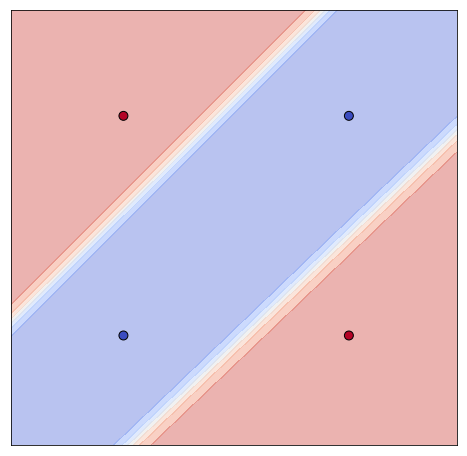

In [2]:
from NN_helpers import draw_response
draw_response(clf,X,y, name) #obejrzyj i przeanalizuj źródło tej funkcji!

## ...a teraz zamiast rzutu z góry, pełen widok 3D

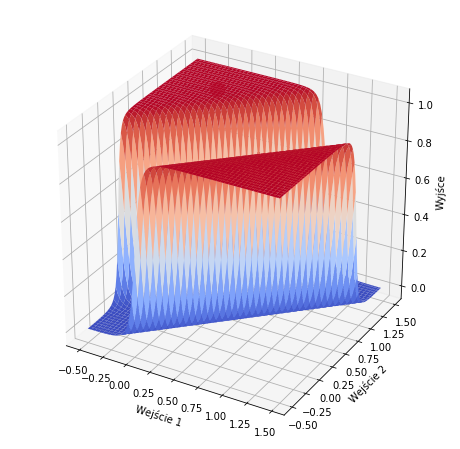

In [3]:
from NN_helpers import draw_response3D
draw_response3D(clf,X,y, name) #obejrzyj i przeanalizuj źródło tej funkcji!
#możesz ją ulepszyć, żeby rysowała kropki w 3D tak jak poprzednia rysuje je w 2D

## Mini-zadanie programistyczne
Na podstawie funkcji ``draw_response3D(clf,X,y)`` napisz podobną funkcję ``draw_output3D()``, która jako argument dostaje sieć neuronową, numer warstwy, numer neuronu w tej warstwie, i dwa numery wejść. Funkcja ta ma &ndash; analogicznie do ``draw_response3D()`` &ndash; wykreślać, jak zmienia się wyjście wybranego neuronu w funkcji jego dwóch wybranych wejść.

## Tak dowiadujemy się o macierze wag pomiędzy warstwami (rozmiary i, jeśli trzeba, wartości):

In [22]:
[coef.shape for coef in clf.coefs_]

[(2, 2), (2, 1)]

## Jeśli chcemy mieć kontrolę nad pojedynczymi krokami uczenia i chcemy sami je kontynuować, używamy ``warm_start``

iter 0 	accuracy 0.25 	loss 0.6931567543177753 	square err 0.25000456186029474
iter 50 	accuracy 0.5 	loss 0.6931557029202174 	square err 0.2500040371467845
iter 100 	accuracy 0.5 	loss 0.6931549784259541 	square err 0.2500036751042211
iter 150 	accuracy 0.5 	loss 0.6931544689281813 	square err 0.2500034201320414
iter 200 	accuracy 0.5 	loss 0.6931541008312637 	square err 0.25000323564812493
iter 250 	accuracy 0.5 	loss 0.6931538257355082 	square err 0.25000309758129063
iter 300 	accuracy 0.5 	loss 0.6931536118114145 	square err 0.2500029900907452
iter 350 	accuracy 0.5 	loss 0.6931534381267631 	square err 0.25000290275038906
iter 400 	accuracy 0.5 	loss 0.693153290915775 	square err 0.2500028286966591
iter 450 	accuracy 0.5 	loss 0.6931531611255357 	square err 0.2500027634101487
iter 500 	accuracy 0.5 	loss 0.6931530428024283 	square err 0.2500027039141013
iter 550 	accuracy 0.5 	loss 0.693152932030999 	square err 0.2500026482471085
iter 600 	accuracy 0.5 	loss 0.6931528262361285 	squ

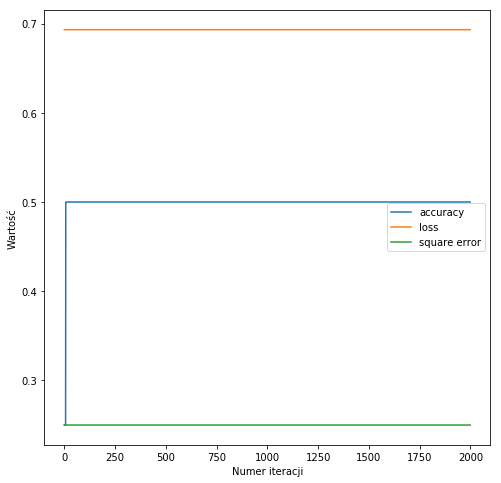

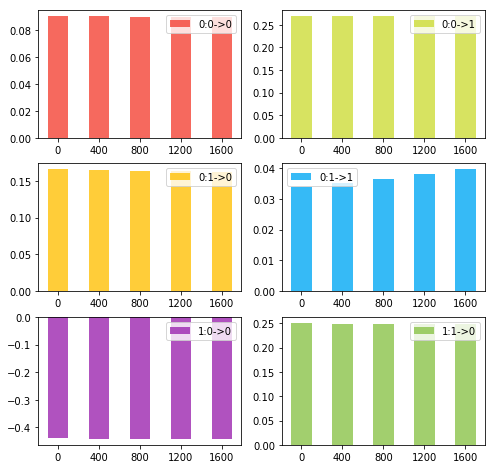

iter 0 	accuracy 0.75 	loss 0.6932393339972902 	square err 0.2500452020256634
iter 50 	accuracy 0.75 	loss 0.6932308597275415 	square err 0.25004095866350834
iter 100 	accuracy 0.75 	loss 0.6932224886637911 	square err 0.250036768779771
iter 150 	accuracy 0.75 	loss 0.6932141951298789 	square err 0.2500326191724266
iter 200 	accuracy 0.75 	loss 0.6932059619553249 	square err 0.25002850095384643
iter 250 	accuracy 0.75 	loss 0.6931977775508196 	square err 0.25002440808063975
iter 300 	accuracy 0.75 	loss 0.6931896339897993 	square err 0.25002033638650767
iter 350 	accuracy 0.75 	loss 0.693181525750126 	square err 0.25001628294569805
iter 400 	accuracy 0.75 	loss 0.6931734488888175 	square err 0.25001224565379365
iter 450 	accuracy 0.75 	loss 0.6931654005008292 	square err 0.2500082229514193
iter 500 	accuracy 0.75 	loss 0.6931573783641445 	square err 0.2500042136419674
iter 550 	accuracy 0.75 	loss 0.6931493807070384 	square err 0.25000021677120654
iter 600 	accuracy 0.75 	loss 0.693141

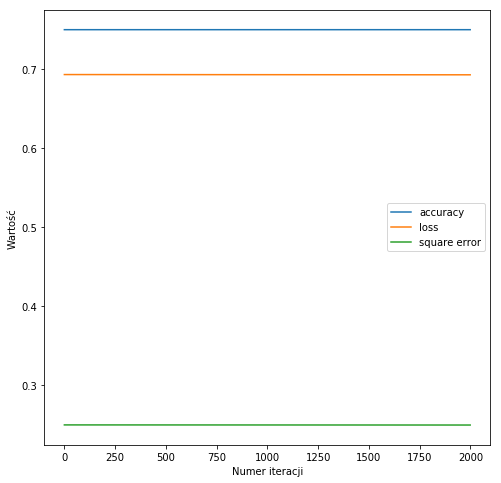

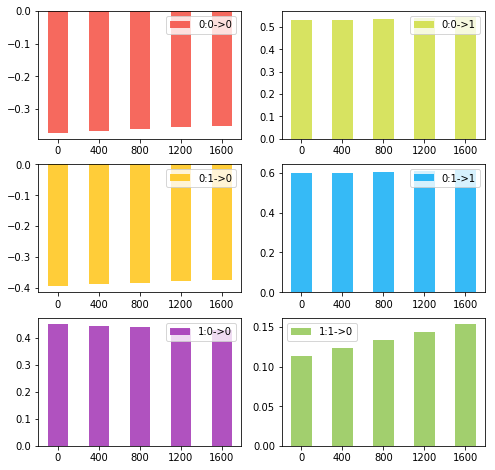

iter 0 	accuracy 0.5 	loss 0.6931709344636231 	square err 0.25001115516304556
iter 50 	accuracy 0.75 	loss 0.6931612681445567 	square err 0.2500063649650889
iter 100 	accuracy 0.75 	loss 0.6931540158443941 	square err 0.2500027721799767
iter 150 	accuracy 0.75 	loss 0.6931485361818497 	square err 0.25000005841848283
iter 200 	accuracy 0.75 	loss 0.6931443581885849 	square err 0.24999798991501476
iter 250 	accuracy 0.75 	loss 0.6931411360268608 	square err 0.24999639504051113
iter 300 	accuracy 0.75 	loss 0.6931386157400902 	square err 0.24999514778941528
iter 350 	accuracy 0.75 	loss 0.6931366108388396 	square err 0.24999415565418237
iter 400 	accuracy 0.5 	loss 0.6931349843743649 	square err 0.24999335072184348
iter 450 	accuracy 0.5 	loss 0.6931336357756592 	square err 0.2499926831366027
iter 500 	accuracy 0.5 	loss 0.6931324911841502 	square err 0.24999211629979898
iter 550 	accuracy 0.5 	loss 0.6931314963565848 	square err 0.2499916233455705
iter 600 	accuracy 0.5 	loss 0.693130611

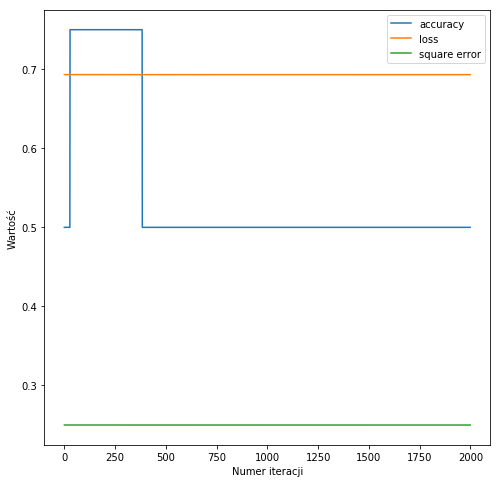

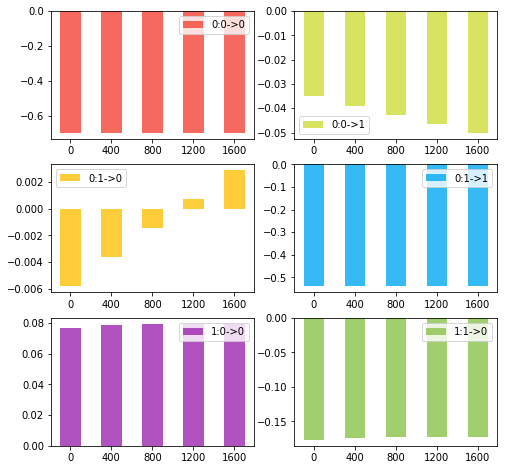

In [5]:
from NN_helpers import draw_square_error, draw_weights_histogram
from sklearn.metrics import mean_squared_error
import copy
for i in [0,5,9]:
    this_name = name + "_" + str(i)
    clf = MLPClassifier(solver=solver, alpha=1e-5, hidden_layer_sizes=hidden_layer_sizes, random_state=i, 
                        max_iter=10000, n_iter_no_change=1000, activation=activation, warm_start=True)
    # clf = MLPClassifier(hidden_layer_sizes=(10,2), random_state=1, max_iter=1, warm_start=True)
    licz=[] #gromadzimy na potrzeby wykresu te trzy parametry
    accu=[]
    loss=[]
    square_error=[]
    weights=[]
    w=[]
    for i in range(2000):
        clf.fit(X, y)
        p = clf.predict_proba(X)
        errs = 0
        for true_res, result in zip(y, p):
            errs += (1 - result[true_res]) ** 2
        errs /= len(p)
        square_error.append(errs)
        licz.append(i)
        accu.append(clf.score(X,y))
        loss.append(clf.loss_)
        if i%50==0: #wyświetlaj postęp obliczeń, co 50-ta epoka
            print("iter",i,"\taccuracy",clf.score(X,y),"\tloss",clf.loss_, "\tsquare err", errs)
            
        if i%400==0:
            weights.append(copy.deepcopy(clf.coefs_))
            w.append(i)
    draw_square_error(licz,accu,loss, square_error, this_name)
    if show_hist:
        draw_weights_histogram(w, weights, this_name)


## Przewidywanie klasy dla zadanych przykładów

In [16]:
clf.predict_proba([[2.0, 2.0], [-1.7, -2.0]])
#prawdopodobieństwa każdej klasy dla każdego przypadku (w wierszach sumują się do 1)

array([[2.58621534e-01, 7.41378466e-01],
       [1.00000000e+00, 6.07011770e-11]])

In [13]:
clf.predict([[2.0, 2.0], [-1.7, -2.0]]) #wybrane najbardziej prawdopodobne klasy

array([1, 0])

## Uczymy się znajomego zbioru irysków
Zwróć uwagę, że atrybut wyjściowy jest nominalny, stąd MLPClassifier automatycznie używa warstwy wyjściowej softmax. Więcej tutaj: https://stackoverflow.com/questions/47359784/how-scikit-learn-implements-the-output-layer

In [8]:
from sklearn.datasets import load_diabetes
from NN_helpers import draw_square_error, draw_weights_histogram, normalize_dataset, drop_each
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
import numpy as np
data = load_diabetes()
activation = 'logistic'
solver = 'sgd'
problem = "pima"
show_hist = True
problem_lower = problem.lower()
hidden_layer_sizes = [8,4]
net_schema_name = "-".join(map(str, hidden_layer_sizes)) + "-1"
name = f"{problem_lower}/{activation}/{solver}/{net_schema_name}/net" 
#...ktoś zapomniał o normalizacji?
clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=1, max_iter=50000, n_iter_no_change=5000)
data.data = normalize_dataset(data.data)
test_data = drop_each(data.data, 10)
# print(test_data)
nparr = np.array(data.data)
test_target = drop_each(data.target, 10)
clf.fit(test_data, test_target)
draw_nn(clf, name)

print("accuracy on learn set:",clf.score(test_data, test_target))
print("accuracy on test set:",clf.score(data.data, data.target))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


layer weight matrix shapes: [(10, 8), (8, 4), (4, 202)]
detected layer sizes: [10, 8, 4, 202]



KeyboardInterrupt



## Normalizacja i podział na zbiór uczący i testujący

iter 0 	test accuracy 0.7597684515195369 	train accuracy 0.6883116883116883
iter 500 	test accuracy 0.7959479015918958 	train accuracy 0.7402597402597403
iter 1000 	test accuracy 0.8104196816208393 	train accuracy 0.7532467532467533
iter 1500 	test accuracy 0.8364688856729378 	train accuracy 0.7402597402597403
iter 2000 	test accuracy 0.8379160636758322 	train accuracy 0.7272727272727273
iter 2500 	test accuracy 0.8451519536903039 	train accuracy 0.7272727272727273
iter 3000 	test accuracy 0.8610709117221418 	train accuracy 0.7142857142857143
iter 3500 	test accuracy 0.8654124457308249 	train accuracy 0.7272727272727273
iter 4000 	test accuracy 0.8610709117221418 	train accuracy 0.7272727272727273
iter 4500 	test accuracy 0.8610709117221418 	train accuracy 0.7142857142857143
iter 5000 	test accuracy 0.8596237337192475 	train accuracy 0.7142857142857143
iter 5500 	test accuracy 0.8625180897250362 	train accuracy 0.7012987012987013
iter 6000 	test accuracy 0.8625180897250362 	train accur

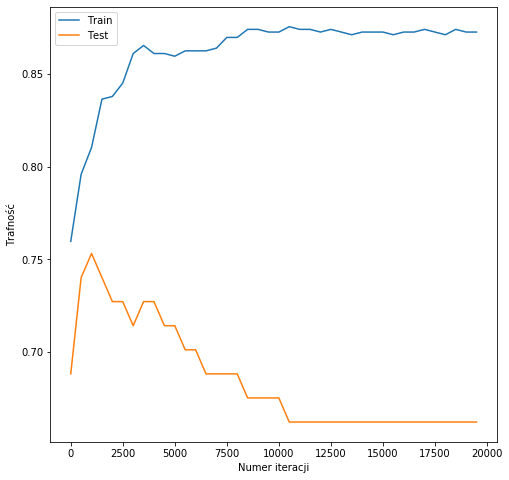

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from NN_helpers import draw_square_error, draw_weights_histogram, normalize_dataset, drop_each, draw_train_and_test_error
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
import numpy as np
from utils import load_pima
X, y = load_pima()
activation = 'logistic'
solver = 'sgd'
problem = "pima"
show_hist = True
problem_lower = problem.lower()
hidden_layer_sizes = [8,4]
net_schema_name = "-".join(map(str, hidden_layer_sizes)) + "-1"
name = f"{problem_lower}/{activation}/{solver}/{net_schema_name}/net_sep" 
# X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 
clf = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes, random_state=1,
    max_iter=100, alpha=1e-5, n_iter_no_change=100, warm_start=True)
licz=[] #gromadzimy na potrzeby wykresu te trzy parametry
train_err=[]
test_err = []

for i in range(20000):
    clf.fit(X_train, y_train)
    if i%500==0: #wyświetlaj postęp obliczeń, co 500-ta epoka
        licz.append(i)
        train_s = clf.score(X_train, y_train)
        train_err.append(train_s)
        test_s = clf.score(X_test, y_test)
        test_err.append(test_s)
        print("iter",i,"\ttest accuracy",train_s,"\ttrain accuracy",test_s)
draw_train_and_test_error(licz,train_err,test_err, name)

print("accuracy on train set:",clf.score(X_train, y_train))
print("accuracy on test set:",clf.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 0 	test accuracy 0.3333333333333333
iter 50 	test accuracy 0.3333333333333333
iter 100 	test accuracy 0.3333333333333333
iter 150 	test accuracy 0.3333333333333333
iter 200 	test accuracy 0.3333333333333333
iter 250 	test accuracy 0.6
iter 300 	test accuracy 0.36666666666666664
iter 350 	test accuracy 0.6
iter 400 	test accuracy 0.7
iter 450 	test accuracy 0.6933333333333334
iter 500 	test accuracy 0.6733333333333333
iter 550 	test accuracy 0.6733333333333333
iter 600 	test accuracy 0.6733333333333333
iter 650 	test accuracy 0.6733333333333333
iter 700 	test accuracy 0.6866666666666666
iter 750 	test accuracy 0.6933333333333334
iter 800 	test accuracy 0.7
iter 850 	test accuracy 0.7
iter 900 	test accuracy 0.7
iter 950 	test accuracy 0.7
iter 1000 	test accuracy 0.7
iter 1050 	test accuracy 0.7066666666666667
iter 1100 	test accuracy 0.72
iter 1150 	test accuracy 0.7333333333333333
iter 1200 	test accuracy 0.74
iter 1250 	test accuracy 0.76
iter 1300 	test accuracy 0.7866666666666

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 0 	test accuracy 0.3333333333333333
iter 50 	test accuracy 0.3333333333333333
iter 100 	test accuracy 0.3333333333333333
iter 150 	test accuracy 0.3333333333333333
iter 200 	test accuracy 0.3333333333333333
iter 250 	test accuracy 0.3333333333333333
iter 300 	test accuracy 0.3333333333333333
iter 350 	test accuracy 0.3333333333333333
iter 400 	test accuracy 0.3333333333333333
iter 450 	test accuracy 0.34
iter 500 	test accuracy 0.4
iter 550 	test accuracy 0.44
iter 600 	test accuracy 0.56
iter 650 	test accuracy 0.6133333333333333
iter 700 	test accuracy 0.64
iter 750 	test accuracy 0.64
iter 800 	test accuracy 0.64
iter 850 	test accuracy 0.6466666666666666
iter 900 	test accuracy 0.6466666666666666
iter 950 	test accuracy 0.64
iter 1000 	test accuracy 0.64
iter 1050 	test accuracy 0.64
iter 1100 	test accuracy 0.64
iter 1150 	test accuracy 0.64
iter 1200 	test accuracy 0.64
iter 1250 	test accuracy 0.64
iter 1300 	test accuracy 0.6333333333333333
iter 1350 	test accuracy 0.63333

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 0 	test accuracy 0.3333333333333333
iter 50 	test accuracy 0.3333333333333333
iter 100 	test accuracy 0.3333333333333333
iter 150 	test accuracy 0.41333333333333333
iter 200 	test accuracy 0.6666666666666666
iter 250 	test accuracy 0.6666666666666666
iter 300 	test accuracy 0.6666666666666666
iter 350 	test accuracy 0.6666666666666666
iter 400 	test accuracy 0.6666666666666666
iter 450 	test accuracy 0.6866666666666666
iter 500 	test accuracy 0.7066666666666667
iter 550 	test accuracy 0.76
iter 600 	test accuracy 0.8133333333333334
iter 650 	test accuracy 0.84
iter 700 	test accuracy 0.88
iter 750 	test accuracy 0.92
iter 800 	test accuracy 0.94
iter 850 	test accuracy 0.9533333333333334
iter 900 	test accuracy 0.96
iter 950 	test accuracy 0.96
iter 1000 	test accuracy 0.96
iter 1050 	test accuracy 0.9666666666666667
iter 1100 	test accuracy 0.9666666666666667
iter 1150 	test accuracy 0.9666666666666667
iter 1200 	test accuracy 0.9666666666666667
iter 1250 	test accuracy 0.9733333

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 0 	test accuracy 0.37333333333333335
iter 50 	test accuracy 0.6333333333333333
iter 100 	test accuracy 0.66
iter 150 	test accuracy 0.66
iter 200 	test accuracy 0.6666666666666666
iter 250 	test accuracy 0.6666666666666666
iter 300 	test accuracy 0.6666666666666666
iter 350 	test accuracy 0.6666666666666666
iter 400 	test accuracy 0.6666666666666666
iter 450 	test accuracy 0.6666666666666666
iter 500 	test accuracy 0.6666666666666666
iter 550 	test accuracy 0.7933333333333333
iter 600 	test accuracy 0.9333333333333333
iter 650 	test accuracy 0.9666666666666667
iter 700 	test accuracy 0.9866666666666667
iter 750 	test accuracy 0.98
iter 800 	test accuracy 0.9733333333333334
iter 850 	test accuracy 0.9733333333333334
iter 900 	test accuracy 0.9733333333333334
iter 950 	test accuracy 0.9733333333333334
iter 1000 	test accuracy 0.9733333333333334
iter 1050 	test accuracy 0.9733333333333334
iter 1100 	test accuracy 0.9733333333333334
iter 1150 	test accuracy 0.9733333333333334
iter 120

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 50 	test accuracy 0.2733333333333333
iter 100 	test accuracy 0.36
iter 150 	test accuracy 0.6666666666666666
iter 200 	test accuracy 0.6666666666666666
iter 250 	test accuracy 0.6666666666666666
iter 300 	test accuracy 0.6866666666666666
iter 350 	test accuracy 0.7066666666666667
iter 400 	test accuracy 0.72
iter 450 	test accuracy 0.7733333333333333
iter 500 	test accuracy 0.8133333333333334
iter 550 	test accuracy 0.86
iter 600 	test accuracy 0.8866666666666667
iter 650 	test accuracy 0.9266666666666666
iter 700 	test accuracy 0.9533333333333334
iter 750 	test accuracy 0.96
iter 800 	test accuracy 0.9666666666666667
iter 850 	test accuracy 0.9666666666666667
iter 900 	test accuracy 0.9666666666666667
iter 950 	test accuracy 0.9666666666666667
iter 1000 	test accuracy 0.9666666666666667
iter 1050 	test accuracy 0.9666666666666667
iter 1100 	test accuracy 0.9666666666666667
iter 1150 	test accuracy 0.9733333333333334
iter 1200 	test accuracy 0.9733333333333334
iter 1250 	test accu

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 0 	test accuracy 0.3333333333333333
iter 50 	test accuracy 0.34
iter 100 	test accuracy 0.5666666666666667
iter 150 	test accuracy 0.6666666666666666
iter 200 	test accuracy 0.6666666666666666
iter 250 	test accuracy 0.6466666666666666
iter 300 	test accuracy 0.6266666666666667
iter 350 	test accuracy 0.56
iter 400 	test accuracy 0.47333333333333333
iter 450 	test accuracy 0.36
iter 500 	test accuracy 0.6666666666666666
iter 550 	test accuracy 0.6666666666666666
iter 600 	test accuracy 0.7466666666666667
iter 650 	test accuracy 0.84
iter 700 	test accuracy 0.9133333333333333
iter 750 	test accuracy 0.96
iter 800 	test accuracy 0.9666666666666667
iter 850 	test accuracy 0.9666666666666667
iter 900 	test accuracy 0.9666666666666667
iter 950 	test accuracy 0.9666666666666667
iter 1000 	test accuracy 0.9666666666666667
iter 1050 	test accuracy 0.9666666666666667
iter 1100 	test accuracy 0.9733333333333334
iter 1150 	test accuracy 0.9733333333333334
iter 1200 	test accuracy 0.973333333

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 50 	test accuracy 0.3333333333333333
iter 100 	test accuracy 0.58
iter 150 	test accuracy 0.4
iter 200 	test accuracy 0.38
iter 250 	test accuracy 0.6933333333333334
iter 300 	test accuracy 0.6933333333333334
iter 350 	test accuracy 0.7066666666666667
iter 400 	test accuracy 0.7533333333333333
iter 450 	test accuracy 0.8066666666666666
iter 500 	test accuracy 0.8266666666666667
iter 550 	test accuracy 0.8733333333333333
iter 600 	test accuracy 0.9266666666666666
iter 650 	test accuracy 0.9533333333333334
iter 700 	test accuracy 0.9533333333333334
iter 750 	test accuracy 0.9533333333333334
iter 800 	test accuracy 0.96
iter 850 	test accuracy 0.96
iter 900 	test accuracy 0.96
iter 950 	test accuracy 0.9666666666666667
iter 1000 	test accuracy 0.9733333333333334
iter 1050 	test accuracy 0.98
iter 1100 	test accuracy 0.98
iter 1150 	test accuracy 0.98
iter 1200 	test accuracy 0.98
iter 1250 	test accuracy 0.98
iter 1300 	test accuracy 0.98
iter 1350 	test accuracy 0.98
iter 1400 	test

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 0 	test accuracy 0.3333333333333333
iter 50 	test accuracy 0.22
iter 100 	test accuracy 0.6333333333333333
iter 150 	test accuracy 0.6
iter 200 	test accuracy 0.5333333333333333
iter 250 	test accuracy 0.6733333333333333
iter 300 	test accuracy 0.6666666666666666
iter 350 	test accuracy 0.68
iter 400 	test accuracy 0.7066666666666667
iter 450 	test accuracy 0.7466666666666667
iter 500 	test accuracy 0.7866666666666666
iter 550 	test accuracy 0.82
iter 600 	test accuracy 0.86
iter 650 	test accuracy 0.92
iter 700 	test accuracy 0.9533333333333334
iter 750 	test accuracy 0.9533333333333334
iter 800 	test accuracy 0.96
iter 850 	test accuracy 0.96
iter 900 	test accuracy 0.9666666666666667
iter 950 	test accuracy 0.9666666666666667
iter 1000 	test accuracy 0.9733333333333334
iter 1050 	test accuracy 0.9733333333333334
iter 1100 	test accuracy 0.9733333333333334
iter 1150 	test accuracy 0.9733333333333334
iter 1200 	test accuracy 0.98
iter 1250 	test accuracy 0.98
iter 1300 	test accu

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 50 	test accuracy 0.6466666666666666
iter 100 	test accuracy 0.6666666666666666
iter 150 	test accuracy 0.6666666666666666
iter 200 	test accuracy 0.6666666666666666
iter 250 	test accuracy 0.68
iter 300 	test accuracy 0.7466666666666667
iter 350 	test accuracy 0.82
iter 400 	test accuracy 0.8666666666666667
iter 450 	test accuracy 0.9266666666666666
iter 500 	test accuracy 0.9533333333333334
iter 550 	test accuracy 0.96
iter 600 	test accuracy 0.9666666666666667
iter 650 	test accuracy 0.9666666666666667
iter 700 	test accuracy 0.9666666666666667
iter 750 	test accuracy 0.9666666666666667
iter 800 	test accuracy 0.9666666666666667
iter 850 	test accuracy 0.9666666666666667
iter 900 	test accuracy 0.9666666666666667
iter 950 	test accuracy 0.9666666666666667
iter 1000 	test accuracy 0.9733333333333334
iter 1050 	test accuracy 0.9733333333333334
iter 1100 	test accuracy 0.9733333333333334
iter 1150 	test accuracy 0.9733333333333334
iter 1200 	test accuracy 0.9733333333333334
iter 1

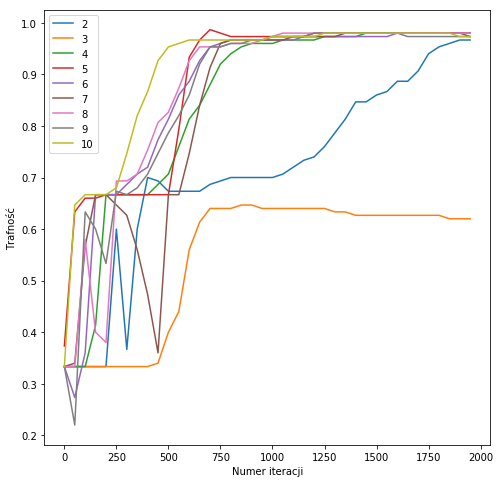

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from NN_helpers import draw_square_error, draw_n_accuracy
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
import numpy as np
data = load_iris()
activation = 'logistic'
solver = 'adam'
problem = "iris"
show_hist = True
problem_lower = problem.lower()
results = {}
iterations = 2000
each = 50
licz= [i for i in range(iterations) if i%each == 0]
name = f"{problem}/accuracy"
for n in range(2,11):
    hidden_layer_sizes = [4,n]
    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes, random_state=1,
        activation=activation,
        solver=solver,
        max_iter=100, alpha=1e-5, n_iter_no_change=100, warm_start=True
    )
    train_err=[]
    for i in range(iterations):
        clf.fit(data.data, data.target)
        if i%each==0: #wyświetlaj postęp obliczeń, co 500-ta epoka
            train_s = clf.score(data.data, data.target)
            train_err.append(train_s)
            print("iter",i,"\ttest accuracy", train_s)
    results[n] = train_err
draw_n_accuracy(licz,results, name)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from NN_helpers import draw_square_error, draw_weights_histogram, normalize_dataset, drop_each, draw_train_and_test_error
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
from utils import load_pima
import numpy as np
X, y = load_pima()
activation = 'logistic'
solver = 'adam'
problem = "pima_unsure"
problem_lower = problem.lower()
hidden_layer_sizes = [8,4]
net_schema_name = "-".join(map(str, hidden_layer_sizes)) + "-1"
name = f"{problem_lower}/{activation}/{solver}/{net_schema_name}/net_sep" 
# X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 
clf = MLPClassifier(
    activation=activation, solver=solver,
    hidden_layer_sizes=hidden_layer_sizes, random_state=1, max_iter=10000, alpha=1e-5, n_iter_no_change=1000)
clf.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[8, 4], learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=1000, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
from sklearn.metrics import confusion_matrix
from NN_helpers import draw_hist

y_pred = clf.predict(X_test)
y_pred_prop = clf.predict_proba(X_test)
print(y_pred_prop)
print(y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print("conf mat", conf_mat)
print("accuracy on train set:",clf.score(X_train, y_train))
print("accuracy on test set:",clf.score(X_test, y_test))
k0s = [0, 0.1, 0.2, 0.3, 0.4, 0.49999]
k1s = [1-k0 for k0 in k0s]
zipped = list(zip(y_pred_prop, y_test))
results = {}
goods = []
bads = []
unknowns = []
for k1 in k1s:
    good = 0
    bad = 0
    unknown = 0
    for [c0, c1], ans in zipped:
        if ans == 1:
            if c1 >= k1:
                good += 1
            elif c0 >= k1:
                bad += 1
            else:
                unknown += 1
        else:
            if c0 >= k1:
                good += 1
            elif c1 >= k1:
                bad += 1
            else:
                unknown += 1
    goods.append(good)
    bads.append(bad)
    unknowns.append(unknown)
results['good'] = goods
results['bad'] = bads
results['unknown'] = unknowns
print(results)
# draw_hist(k1s, results, name)
    

[[0.69118619 0.30881381]
 [0.93573369 0.06426631]
 [0.95435732 0.04564268]
 [0.7591589  0.2408411 ]
 [0.57400745 0.42599255]
 [0.45702334 0.54297666]
 [0.97593663 0.02406337]
 [0.17139381 0.82860619]
 [0.24852849 0.75147151]
 [0.49060185 0.50939815]
 [0.72646927 0.27353073]
 [0.45412768 0.54587232]
 [0.6465754  0.3534246 ]
 [0.32934178 0.67065822]
 [0.9531957  0.0468043 ]
 [0.45218442 0.54781558]
 [0.94604317 0.05395683]
 [0.96429322 0.03570678]
 [0.20624946 0.79375054]
 [0.48022074 0.51977926]
 [0.74371802 0.25628198]
 [0.96056922 0.03943078]
 [0.70511894 0.29488106]
 [0.95749548 0.04250452]
 [0.33928412 0.66071588]
 [0.19160745 0.80839255]
 [0.89949647 0.10050353]
 [0.97128935 0.02871065]
 [0.90481142 0.09518858]
 [0.88206738 0.11793262]
 [0.21332961 0.78667039]
 [0.24857345 0.75142655]
 [0.14853613 0.85146387]
 [0.11247316 0.88752684]
 [0.18713988 0.81286012]
 [0.13975811 0.86024189]
 [0.35210086 0.64789914]
 [0.50997984 0.49002016]
 [0.74173175 0.25826825]
 [0.26739416 0.73260584]


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from NN_helpers import draw_square_error, draw_weights_histogram, normalize_dataset, drop_each, draw_train_and_test_error
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
import numpy as np
data = load_iris()
activation = 'logistic'
solver = 'adam'
problem = "iris"
show_hist = True
problem_lower = problem.lower()
hidden_layer_sizes = [4,3]
net_schema_name = "-".join(map(str, hidden_layer_sizes)) + "-1"
name = f"{problem_lower}/{activation}/{solver}/{net_schema_name}/net_sep" 
X, y = data.data, data.target
# X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 
iris_clf = MLPClassifier(
    activation=activation, solver=solver,
    hidden_layer_sizes=hidden_layer_sizes, random_state=1, max_iter=20000, alpha=1e-5, n_iter_no_change=1000)
iris_clf.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[4, 3], learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       n_iter_no_change=1000, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

layer weight matrix shapes: [(4, 4), (4, 3), (3, 3)]
detected layer sizes: [4, 4, 3, 3]


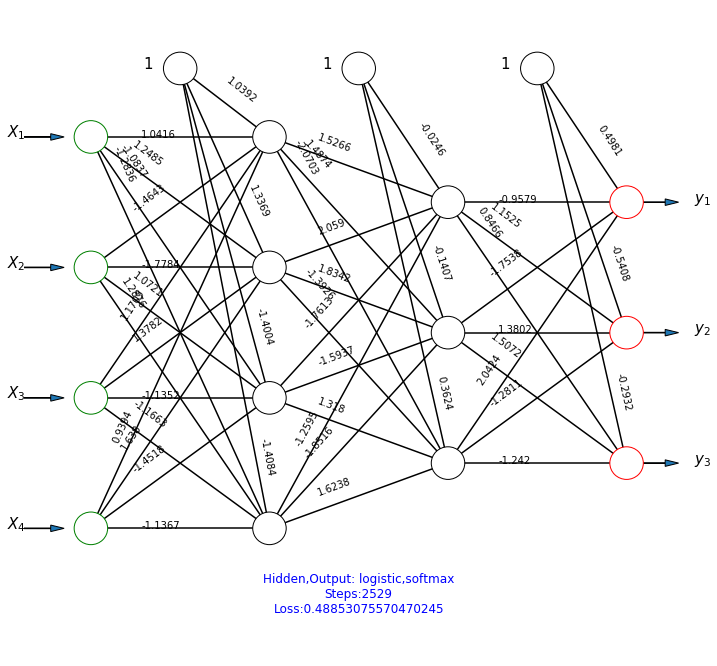

accuracy on train set: 0.674074074074074
accuracy on test set: 0.6


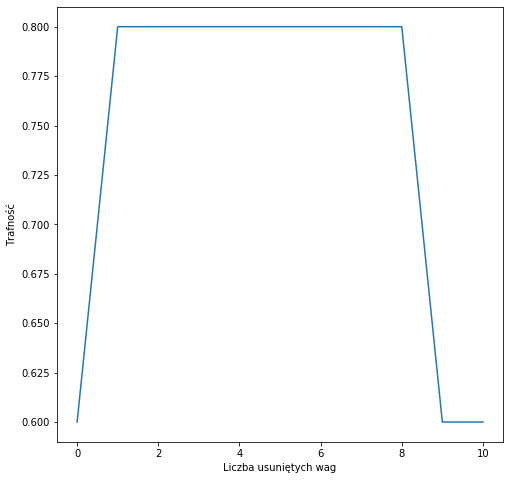

In [6]:
from sklearn.metrics import confusion_matrix
from NN_helpers import draw_nn, draw_n_accuracy
from utils import remove_lowest_weights
draw_nn(iris_clf, name)
iterations = [0]
accuracy = [iris_clf.score(X_test, y_test)]
for i in range(10):
    remove_lowest_weights(iris_clf.coefs_)
    iterations.append(i+1)
    accuracy.append(iris_clf.score(X_test, y_test))
data = {}
data['accuracy'] = accuracy
draw_n_accuracy(iterations, data, name, x_label="Liczba usuniętych wag", y_label="Trafność")

print("accuracy on train set:",iris_clf.score(X_train, y_train))
print("accuracy on test set:",iris_clf.score(X_test, y_test))

In [8]:
print(y_train)

[1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2
 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0
 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1
 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]


layer weight matrix shapes: [(4, 4), (4, 3), (3, 3)]
detected layer sizes: [4, 4, 3, 3]


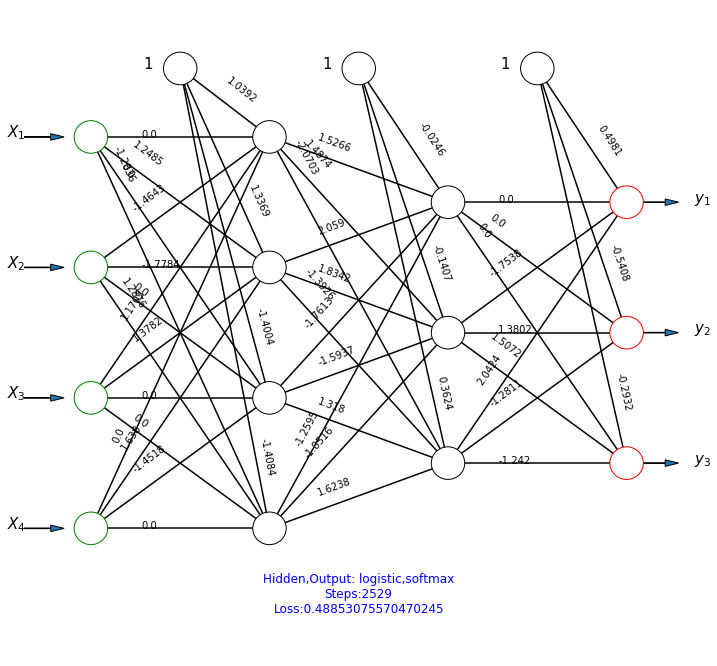

In [7]:

draw_nn(iris_clf, name + "-removed")

## Inne gotowe zbiory danych, PIMA, BUPA
Przydadzą się nam jeszcze ``load_diabetes()`` (a.k.a. "PIMA") i ewentualnie ``load_breast_cancer()``.

Zobacz https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

...a także do bardziej "ręcznego" załadowania &ndash; zbiór "BUPA", 
https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data
z kolumnami ['mcv','alkphos','sgpt','sgot','gammagt','drinks','selector'].

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SCORE  0.9333333333333333 LOSS 0.10489223980477229 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SCORE  0.9333333333333333 LOSS 0.0926430038476387 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SCORE  0.9333333333333333 LOSS 0.09888696062105823 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SCORE  0.9333333333333333 LOSS 0.09141618437871539 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SCORE  0.9333333333333333 LOSS 0.07762829443520847 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SCORE  0.9333333333333333 LOSS 0.061588919009451924 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SCORE  1.0 LOSS 0.06316920759825986 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SCORE  1.0 LOSS 0.04967995752558826 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SCORE  0.8 LOSS 0.03623107202183715 



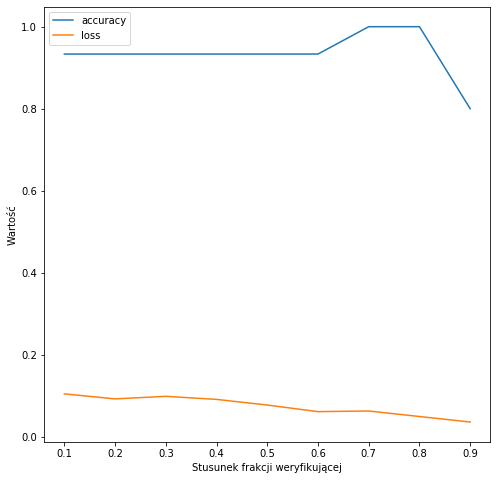

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from NN_helpers import draw_square_error, draw_weights_histogram, normalize_dataset, drop_each, draw_train_and_test_error
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn, draw_n_accuracy
import numpy as np
data = load_iris()
activation = 'logistic'
solver = 'adam'
problem = "iris_val"
show_hist = True
problem_lower = problem.lower()
hidden_layer_sizes = [4,3]
net_schema_name = "-".join(map(str, hidden_layer_sizes)) + "-1"
name = f"{problem_lower}/{activation}/{solver}/{net_schema_name}/net_sep" 
X, y = data.data, data.target
# X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
results = []
loss=[]
iters=[]
for i in range(1, 10):
    clf_i = MLPClassifier(
        activation=activation, solver=solver, validation_fraction=i/10,
        hidden_layer_sizes=hidden_layer_sizes, random_state=1, max_iter=5000,
        alpha=1e-5, n_iter_no_change=5000, early_stopping=True)
    clf_i.fit(X_train, y_train)
    iters.append(i/10)
    sc = clf_i.score(X_test, y_test)
    results.append(sc)
    loss.append(clf_i.loss_)
    print("SCORE ", sc, "LOSS",clf_i.loss_, "\n")
data = {}
data['accuracy'] = results
data['loss'] = loss
draw_n_accuracy(iters, data, name, x_label="Stusunek frakcji weryfikującej", y_label="Wartość")


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from NN_helpers import draw_square_error, draw_n_accuracy
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
from utils import load_pima
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
configs = [
    {'solver': 'sgd', 'learning_rate':'constant', 'learning_rate_init':0.001},
    {'solver': 'sgd', 'learning_rate':'constant', 'learning_rate_init':0.01},
    {'solver': 'sgd', 'learning_rate':'constant', 'learning_rate_init':0.1},
    {'solver': 'adam',  'learning_rate_init':0.1},
    {'solver': 'adam',  'learning_rate_init':0.01},
    {'solver': 'adam',  'learning_rate_init':0.001},
    {'solver': 'lbfgs'}
]
learning_rates = [0.001, 0.01, 0.1]
X, y = load_pima()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
problem = "pima_alg"
problem_lower = problem.lower()
results = {}
iterations = 100
each = 5
licz= [i for i in range(iterations) if i%each == 0]
name = f"{problem}/accuracy"
hidden_layer_sizes = [8,4]
activation='relu'
for conf in configs:
    accu = [[] for i in range(iterations) if i%each == 0]
    for s in [0, 1,2,3,4]:
        c = {**conf}
        c['hidden_layer_sizes']=hidden_layer_sizes
        c['random_state'] = s
        c['activation'] = activation
        c['max_iter'] = 10
        c['alpha'] = 1e-5
        c['n_iter_no_change'] = 10
        c['warm_start'] = True
        clf = MLPClassifier(**conf)
        index = 0
        for i in range(iterations):
            clf.fit(X_train, y_train)
            if i%each==0:
                train_s = clf.score(X_train, y_train)
                test_s = clf.score(X_test, y_test)
                accu[index].append(test_s)
                index += 1
                print(c['solver'], "iter",i,"\ttest accuracy", test_s, "\ttrain accuracy", train_s)
                
    label = conf['solver']
    if 'learning_rate_init' in conf:
        label += "_" + str(conf['learning_rate_init'])
    results[label] = [sum(x)/len(x) for x in accu]
draw_n_accuracy(licz,results, name, x_label="Numer iteracji uczenia", y_label="Trafność klasyfikacji")

sgd iter 0 	test accuracy 0.7662337662337663 	train accuracy 0.7785817655571635


In [1]:

from sklearn.neural_network import MLPClassifier
def test_clasifiers(configs):
    results = []
    for conf in configs:
        accu = []
        for s in [0,1,2,3,4]:
            c = {**conf}
            c['random_state'] = s
            c['max_iter'] = 10000
            c['n_iter_no_change'] = 500
            clf = MLPClassifier(**c)
            clf.fit(X_train, y_train)
            train_s = clf.score(X_train, y_train)
            test_s = clf.score(X_test, y_test)
            accu.append(test_s)
            print(conf, "\ttest accuracy", test_s, "\ttrain accuracy", train_s)
        results.append(sum(accu)/len(accu)) 
    out = list(zip(configs, results))
    out.sort(key=lambda x: x[1], reverse = True)
    return out

def print_in_lines(res):
    print("----results----- \n")
    for o in res:
        print(o)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from NN_helpers import draw_square_error, draw_n_accuracy
from NN_helpers import draw_nn
from utils import load_pima
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

X, y = load_pima()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
problem = "pima_alg_perf"
problem_lower = problem.lower()
name = f"{problem}/best"


In [9]:
configs3 = [
    {'solver': 'sgd',  'learning_rate_init':1e-4, 'activation':'relu', 'hidden_layer_sizes':[16,8],'alpha': 1e-4, 'learning_rate': 'adaptive'},
    {'solver': 'sgd',  'learning_rate_init':1e-3, 'activation':'relu', 'hidden_layer_sizes':[16,8],'alpha': 1e-5, 'learning_rate': 'adaptive'},
    {'solver': 'sgd',  'learning_rate_init':1e-4, 'activation':'relu', 'hidden_layer_sizes':[32,16,8],'alpha': 1e-4, 'learning_rate': 'adaptive'},
 ]

res3 = test_clasifiers(configs3)
print_in_lines(res2)

{'solver': 'sgd', 'learning_rate_init': 0.0001, 'activation': 'relu', 'hidden_layer_sizes': [16, 8], 'alpha': 0.0001, 'learning_rate': 'adaptive'} 	test accuracy 0.6753246753246753 	train accuracy 0.768451519536903
{'solver': 'sgd', 'learning_rate_init': 0.0001, 'activation': 'relu', 'hidden_layer_sizes': [16, 8], 'alpha': 0.0001, 'learning_rate': 'adaptive'} 	test accuracy 0.7402597402597403 	train accuracy 0.7626628075253257
{'solver': 'sgd', 'learning_rate_init': 0.0001, 'activation': 'relu', 'hidden_layer_sizes': [16, 8], 'alpha': 0.0001, 'learning_rate': 'adaptive'} 	test accuracy 0.6623376623376623 	train accuracy 0.7568740955137482
{'solver': 'sgd', 'learning_rate_init': 0.0001, 'activation': 'relu', 'hidden_layer_sizes': [16, 8], 'alpha': 0.0001, 'learning_rate': 'adaptive'} 	test accuracy 0.6233766233766234 	train accuracy 0.7626628075253257
{'solver': 'sgd', 'learning_rate_init': 0.0001, 'activation': 'relu', 'hidden_layer_sizes': [16, 8], 'alpha': 0.0001, 'learning_rate': 'a